In [2]:
import csv
import numpy as np
# Nombre del archivo CSV
archivo_csv = "Efecto Hall.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "I(0.01)A": [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, None, None, None, None, None, None, None, None]
Columna "B(0.1)mT": [0.0, 3.5, 7.5, 11.3, 15.2, 19.0, 23.3, None, None, None, None, None, None, None, None]
Columna "pVh 0": [-5.1, -3.2, -1.5, 0.01, 1.8, 3.3, 4.9, None, None, None, None, None, None, None, None]
Columna "pVh 5": [-8.4, -5.2, -1.3, 1.4, 4.4, 7.4, 10.4, None, None, None, None, None, None, None, None]
Columna "pVh 10": [-11.5, -7.0, -2.0, 2.2, 6.9, 11.0, -15.5, None, None, None, None, None, None, None, None]
Columna "pVh 15": [-15.1, -9.1, -1.9, 3.8, 8.6, 14.8, 20.3, None, None, None, None, None, None, None, None]
Columna "pVh 20": [-18.0, -10.8, -2.3, 4.4, 12.0, 18.6, 25.3, None, None, None, None, None, None, None, None]
Columna "pVh(mV) 0": [1.2, 1.6, 2.0, 2.4, 2.7, 3.0, 3.4, None, None, None, None, None, None, None, None]
Columna "pVh 3.5": [0.9, -0.2, -1.4, -2.6, -3.7, -4.7, -5.6, None, None, None, None, None, None, None, None]
Columna "pVh 7.5": [0.6, -1.6, -4.

In [3]:
A = columnas["I(0.01)A"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["B(0.1)mT"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])
print(Y)

[0.0, 3.5, 7.5, 11.3, 15.2, 19.0, 23.3]


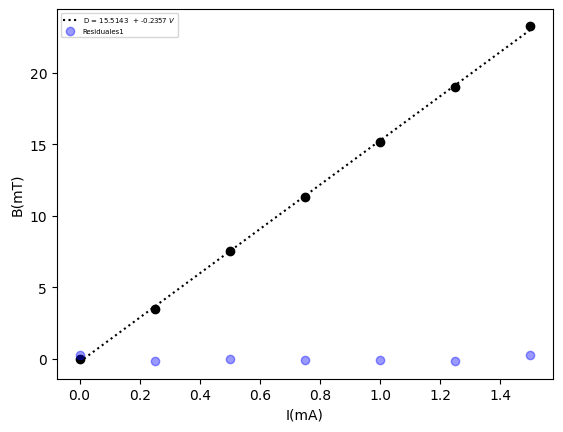

La incertidumbre en el pendiente es de 0.1462
La incertidumbre en el intercepto es de 0.1318


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('I(mA)')
plt.ylabel("B(mT)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("IvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
#print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
#print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")


In [5]:
A = columnas["pVh 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["pVh 5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["pVh 10"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["pVh 15"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["pVh 20"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["Ip"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

print(Y)
print(Y1)
print(Y2)
print(Y3)
print(Y4)
print(X)

[-5.1, -3.2, -1.5, 0.01, 1.8, 3.3, 4.9]
[-8.4, -5.2, -1.3, 1.4, 4.4, 7.4, 10.4]
[-11.5, -7.0, -2.0, 2.2, 6.9, 11.0, -15.5]
[-15.1, -9.1, -1.9, 3.8, 8.6, 14.8, 20.3]
[-18.0, -10.8, -2.3, 4.4, 12.0, 18.6, 25.3]
[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]


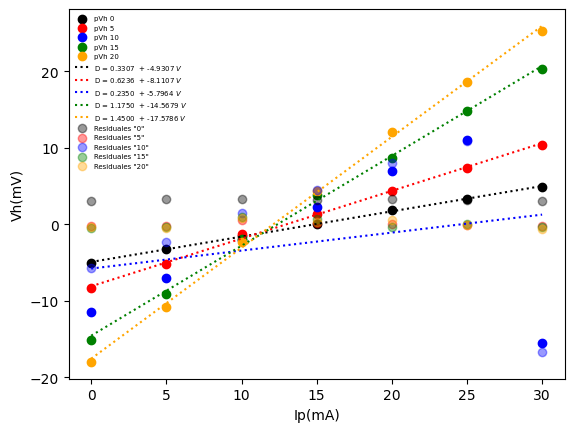

La incertidumbre en el pendiente es de 0.0046
La incertidumbre en el intercepto es de 0.0826
La incertidumbre en el pendiente es de 0.0123
La incertidumbre en el intercepto es de 0.2215
La incertidumbre en el pendiente es de 0.387
La incertidumbre en el intercepto es de 6.9766
La incertidumbre en el pendiente es de 0.0245
La incertidumbre en el intercepto es de 0.4416
La incertidumbre en el pendiente es de 0.0226
La incertidumbre en el intercepto es de 0.407


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='pVh 0', color='black')
plt.scatter(X, Y1, label='pVh 5', color='red')
plt.scatter(X, Y2, label='pVh 10', color='blue')
plt.scatter(X, Y3, label='pVh 15', color='green')
plt.scatter(X, Y4, label='pVh 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vh(mV)')
plt.xlabel("Ip(mA)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVhvsIp.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

In [8]:
A = columnas["pVh(mV) 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["pVh 3.5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["pVh 7.5"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["pVh 11.3"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["pVh 15.2"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["B(0.1)mT"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

print(X)
print(X1)
print(X2)
print(X3)
print(X4)
print(Y)

[0.0, 3.5, 7.5, 11.3, 15.2, 19.0, 23.3]


<class 'NameError'>: name 'X1' is not defined

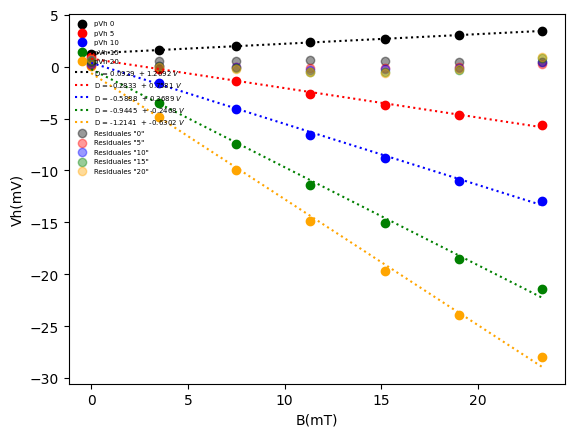

La incertidumbre en el pendiente es de 0.0027
La incertidumbre en el intercepto es de 0.0371
La incertidumbre en el pendiente es de 0.008
La incertidumbre en el intercepto es de 0.1102
La incertidumbre en el pendiente es de 0.0146
La incertidumbre en el intercepto es de 0.201
La incertidumbre en el pendiente es de 0.0278
La incertidumbre en el intercepto es de 0.3837
La incertidumbre en el pendiente es de 0.0321
La incertidumbre en el intercepto es de 0.4425


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='pVh 0', color='black')
plt.scatter(X, Y1, label='pVh 5', color='red')
plt.scatter(X, Y2, label='pVh 10', color='blue')
plt.scatter(X, Y3, label='pVh 15', color='green')
plt.scatter(X, Y4, label='pVh 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vh(mV)')
plt.xlabel("B(mT)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVhvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

In [10]:
A = columnas["pVl"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])

B=columnas["T"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

print(Y)
print(X)

[0.51, 0.53, 0.55, 0.57, 0.58, 0.6, 0.62, 0.64, 0.65, 0.66, 0.66, 0.65, 0.65, 0.61, 0.57]
[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]


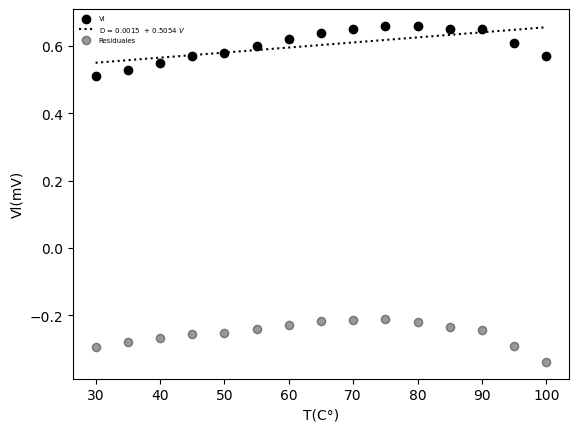

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0308
La incertidumbre en el pendiente es de 0.008
La incertidumbre en el intercepto es de 0.1102


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))


# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y,label='Vl', color='black')

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Vl(mV)')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVlvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

In [12]:
A = columnas["pVh"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])

B=columnas["T"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

print(Y)
print(X)

[1.0, 1.0, 0.9, 0.9, 0.8, 0.7, 0.7, 0.6, 0.5, 0.5, 0.4, 0.4, 0.4, 0.5, 0.6]
[30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0]


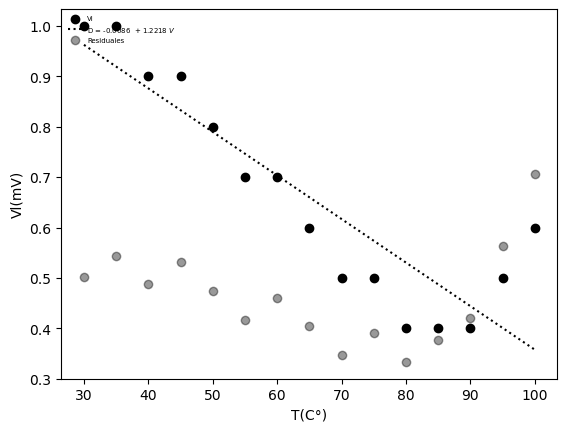

La incertidumbre en el pendiente es de 0.0012
La incertidumbre en el intercepto es de 0.0828
La incertidumbre en el pendiente es de 0.008
La incertidumbre en el intercepto es de 0.1102


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))


# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y,label='Vl', color='black')

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Vl(mV)')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVhvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

In [14]:
A = columnas["pVl(V)(0.001)"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["pVl 0"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["pVl 5"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["pVl 10"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["pVl 20"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["Ip"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

print(Y)
print(Y1)
print(Y2)
print(Y3)
print(Y4)
print(X)

[0.025, -0.143, -0.324, -0.502, -0.656, -0.822, -0.976]
[0.01, -0.138, -0.325, -0.49, -0.63, -0.822, -1.019]
[-0.07, -0.149, -0.304, -0.48, -0.674, -0.832, -0.998]
[0.033, -0.156, -0.318, -0.518, -0.654, -0.826, -1.01]
[0.055, -0.143, -0.299, -0.496, -0.678, -0.838, -1.0]
[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]


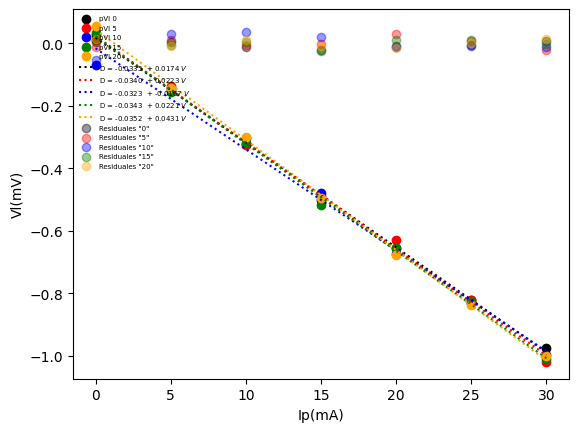

La incertidumbre en el pendiente es de 0.0004
La incertidumbre en el intercepto es de 0.0074
La incertidumbre en el pendiente es de 0.0007
La incertidumbre en el intercepto es de 0.012
La incertidumbre en el pendiente es de 0.0013
La incertidumbre en el intercepto es de 0.0231
La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0097
La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0092


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='pVl 0', color='black')
plt.scatter(X, Y1, label='pVl 5', color='red')
plt.scatter(X, Y2, label='pVl 10', color='blue')
plt.scatter(X, Y3, label='pVl 15', color='green')
plt.scatter(X, Y4, label='pVl 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vl(mV)')
plt.xlabel("Ip(mA)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVlvsIp.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

In [ ]:
from scipy import constants as cons
def d(D,V):
    return(2*0.135*cons.h/(D*np.sqrt(2*cons.e*cons.m_e)*np.sqrt(V)))
d1=[]#distancia interplanar 1
for i in range(len(X)):
    d1.append(d(Y1[i],X[i]))
d2=[]#distancia interplanar 2
for i in range(len(X)):
    d2.append(d(Y2[i],X[i]))
print(d1)
print(d2)

In [ ]:
def h(D,V,d): #calcular la constante de Planck usando las distancias interplanares
    return(d*np.sqrt(2*cons.e*cons.m_e)*D*np.sqrt(V)/(2*0.135))
h1=[]
h2=[]
for i in range(len(X)):
    h1.append(h(Y1[i],X[i],d1[i]))
for i in range(len(X)):
    h2.append(h(Y2[i],X[i],d2[i]))
print(h1)
print(h2)